##### [ ML - 생선 분류 모델 만들기 1 ]
- 주  제 : 2개 종류 생선 분류 모델 만들기
- 데이터 : ../Data/fish.csv
- 피쳐들 : 길이와 무게. 실수형
- 타  겟 : 생선종류
- 학습종류 : 지도 학습 => 분류
- 학습방법 : 다양한 알고리즘들 => kNN 최근접 이웃 알고리즘

[1] 데이터 확인 : 피쳐와 타겟 <HR>

In [2]:
## [1] 모률 로딩 데이터 확인
%pip install koreanize_matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
## [1-2] 데이터 로딩 및 빙어와 도미 데이터만 추출
data_file = '../Data/fish.csv'

## 품종, 무게, 길이 컬럼만 추출
allDF = pd.read_csv(data_file, usecols=[0,1,2])
display(allDF.head())

## bream도미, smelt빙어 행만 추출
fishDF = allDF[(allDF.Species == 'Bream') | (allDF.Species == 'Smelt')]

## 행인덱스 초기화
fishDF.reset_index(drop=True, inplace=True)

# display(fishDF)
fishDF.info()
fishDF.to_csv("data.csv")


,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


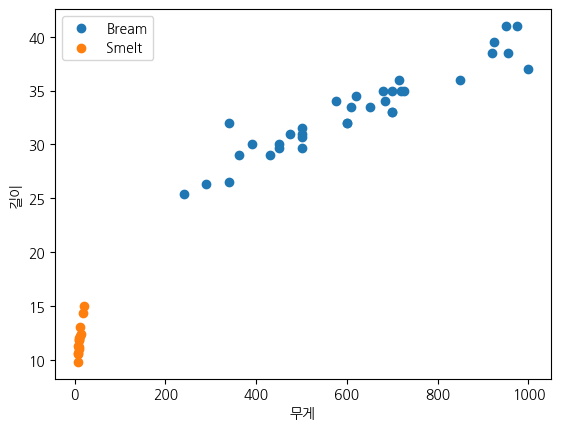

C:\Users\kdt008\AppData\Local\Temp\ipykernel_17148\1652683722.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fishDF['label'] = fishDF.loc[:,'Species'].apply(lambda x: 1 if x == 'Bream' else -1)


,Weight,Length,label
Weight,1.000000,0.960347,0.843828
Length,0.960347,1.000000,0.944132
label,0.843828,0.944132,1.000000


In [ ]:
## [1-3] 무게와 길이 피쳐와 품종 분류 가능 여부
## - 시각화
for species, sub in fishDF.groupby('Species'):

    plt.scatter(sub['Weight'], sub['Length'], label=species)

plt.xlabel('무게')
plt.ylabel('길이')
plt.legend()
plt.show()

## - 상관계수
fishDF['label'] = fishDF.loc[:,'Species'].apply(lambda x: 1 if x == 'Bream' else -1)
fishDF.corr(numeric_only=True)
